In [32]:
import tweepy as tw
from tweepy import API
from collections import defaultdict
from dotenv import load_dotenv
from pynput import keyboard
import json
import os
import io
load_dotenv("config.env")

True

In [33]:
# Twitter authentication
auth = tw.OAuthHandler(
    os.environ["api_key"],
    os.environ["api_key_secret"],
)
auth.set_access_token(
    os.environ["access_token"],
    os.environ["access_token_secret"],
)

# Creating an API object, the api will wait if the rate limit exceeds
# NOTE:- API rate limit is 180 calls every 15 mins
# wait_on_rate_limit=True use this to apply sleep of 15 min 
api = tw.API(auth,wait_on_rate_limit=True)


In [34]:
def startupCheck():
    PATH = "./data.json"
    if os.path.isfile(PATH) and os.access(PATH, os.R_OK):
        # checks if file exists
        print("File exists and is readable")
    else:
        print("Either file is missing or is not readable, creating file...")
        with io.open("data.json", "w") as db_file:
            # profile_link will contain all users and thier profile picture
            # connections is adjascency list to form a network
            # screen_names will act as queue in order to expand the network
            db_file.write(
                json.dumps(
                    {
                        "profile_link": {},
                        "connections": {},
                        "starting_name": "ps_pujansheth",
                        "screen_names": ["ps_pujansheth"],
                    }
                )
            )


startupCheck()


File exists and is readable


In [35]:
# Loading the newly written or preloaded json file
with open('./data.json', 'r') as file:
    data = json.load(file)

In [36]:
# Get the first user deatils and store the profile image
fp_data=api.get_user(screen_name=data['starting_name'])
if data['starting_name'] not in data['profile_link']:
    data['profile_link'][data['starting_name']] = fp_data.profile_image_url_https
connections = defaultdict(list)

In [37]:
print(data['profile_link'])

{'ps_pujansheth': 'https://pbs.twimg.com/profile_images/602014165453045760/sXKYCQod_normal.jpg', 'irvingjoanne17': 'https://pbs.twimg.com/profile_images/1595444276611239941/iZXnSyot_normal.jpg', 'Pari1602': 'https://pbs.twimg.com/profile_images/1280529845139587072/45amTj1x_normal.jpg', 'mbbarot69': 'https://pbs.twimg.com/profile_images/1611569015142645760/cuqcGINJ_normal.jpg', 'kush0099': 'https://pbs.twimg.com/profile_images/1501568268263313415/TNbB1fM7_normal.jpg', 'payal_pabari': 'https://pbs.twimg.com/profile_images/902251597752885249/IVdQqfN6_normal.jpg', 'MrDavid1901': 'https://pbs.twimg.com/profile_images/1624372932230402048/0MPpOjXP_normal.jpg', 'JubinYadav1': 'https://pbs.twimg.com/profile_images/1412783181095333892/puU7sJlw_normal.jpg', 'JPL_India': 'https://pbs.twimg.com/profile_images/1555260451046707200/m9MuZEWU_normal.jpg', 'RashiJoshi19': 'https://pbs.twimg.com/profile_images/1507276753928351746/xetSZBJb_normal.jpg', 'PenhaAllen': 'https://pbs.twimg.com/profile_images/12

In [38]:
flag = True

# Get at most 10 followers for a given node
# Network starts with me
def get_all_followers(screen_name):
    followers = []
    try:
        for follower in tw.Cursor(
            method=api.get_followers, screen_name=screen_name
        ).items(10):
            data["profile_link"][
                follower.screen_name
            ] = follower.profile_image_url_https
            followers.append(follower.screen_name)
            if follower.screen_name not in data["screen_names"]:
                data["screen_names"].append(follower.screen_name)
    except Exception:
        return _extracted_from_get_all_followers_14()
    return followers


# TODO Rename this here and in `get_all_followers`
def _extracted_from_get_all_followers_14():
    global flag
    print(Exception)
    print("Leaving the program due to exception")
    print("Saving the connections to the json file")
    data["connections"] = {**data["connections"], **connections}
    with open("./data.json", "w") as file:
        file.write(json.dumps(data))
    flag = False
    return 'stop'


# Run until no of nodes/profiles not exceed 500
def streaming():
    if len(data['connections']) >= 500:
        return "Gathered the maximum number of users/nodes allowed"
    for name in data["screen_names"]:
        if name not in data["connections"]:
            print(f"Adding a node with screen name {name}")
            response = get_all_followers(name)
            if response == 'stop':
                return 'Stopped the streaming due to an error'
            else: 
                connections[name] = response
    return f"Got a total of {len(data['profile_link'])} users"


def main():
    while flag:
        print(f"Starting at {data['starting_name']}")
        if len(data["profile_link"]) > 501:
            return "Gathered the maximum number of users/nodes allowed which is equal to 500"
        print(streaming())
    return "Stopped the streaming"


print(main())


Starting at ps_pujansheth
Adding a node with screen name JeD87260622
<class 'Exception'>
Leaving the program due to exception
Saving the connections to the json file
Stopped the streaming due to an error
Stopped the streaming


### Graph Creation

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import urllib.request
from PIL import Image

In [40]:
# Generating nodes
G = nx.Graph()
for name, profile_pic in data['profile_link'].items():
    G.add_node(name, image=np.array(Image.open(urllib.request.urlopen(profile_pic))))
print(G.nodes())

['ps_pujansheth', 'irvingjoanne17', 'Pari1602', 'mbbarot69', 'kush0099', 'payal_pabari', 'MrDavid1901', 'JubinYadav1', 'JPL_India', 'RashiJoshi19', 'PenhaAllen', 'michaelvbuffalo', 'Wright_habits', 'HookedSounds', 'JeD87260622', 'LhordRicch1', 'Hasa007788', 'FnSbyruqayyah', 'maxine_dwnunder', 'SapetaJes', 'WIZZYCHRISMUSI3', 'SwatiRKSaha', 'BhattKesha2806', 'MarooMansi', 'siddharth_sonak', 'PawaskarKeyur', 'kimaya_mhatre_', 'aditi_metkar', 'AdityaSatpurkar', 'durgappadk9', 'pandeyvinay1297', 'RajeevShuklaBjp', 'JuhiDeshmukh1', 'Jitharshjaihind', 'Jayprak67848307', 'RajuSingh990', 'Sanjuve2024', 'shaileshbrahm', 'Supriya00646442', 'drmahendra3069', 'KokoOmbu', 'jaggirm', '1710RAJ', 'shottrader2006', 'Takfaheem', '9cf94c8bf7c6472', 'csheth12', 'keshavimehta13', 'talati_palak', 'IngriddeBock', 'TheSecretLawofA', 'KRAFTON_BGMI', 'bhavya10373', 'msuper20506679', 'hockenberrycaro', 'DavidSSKCapital', 'barker_mildred9', 'Mulyadi58882863', 'd1videndinvest', 'SaraSheikh05', 'Shiori11824613', 're

In [41]:
# Adding an edge to signify connection between nodes aka users
for parent, followers in data['connections'].items():
    for follower in followers:
        G.add_edge(parent, follower)
print(G.edges())

[('ps_pujansheth', 'irvingjoanne17'), ('ps_pujansheth', 'Pari1602'), ('ps_pujansheth', 'mbbarot69'), ('ps_pujansheth', 'kush0099'), ('ps_pujansheth', 'payal_pabari'), ('ps_pujansheth', 'MrDavid1901'), ('ps_pujansheth', 'JubinYadav1'), ('ps_pujansheth', 'JPL_India'), ('ps_pujansheth', 'RashiJoshi19'), ('ps_pujansheth', 'PenhaAllen'), ('irvingjoanne17', 'michaelvbuffalo'), ('irvingjoanne17', 'Wright_habits'), ('irvingjoanne17', 'HookedSounds'), ('irvingjoanne17', 'JeD87260622'), ('irvingjoanne17', 'LhordRicch1'), ('irvingjoanne17', 'Hasa007788'), ('irvingjoanne17', 'FnSbyruqayyah'), ('irvingjoanne17', 'maxine_dwnunder'), ('irvingjoanne17', 'SapetaJes'), ('irvingjoanne17', 'WIZZYCHRISMUSI3'), ('Pari1602', 'SwatiRKSaha'), ('Pari1602', 'BhattKesha2806'), ('Pari1602', 'MarooMansi'), ('Pari1602', 'siddharth_sonak'), ('Pari1602', 'PawaskarKeyur'), ('Pari1602', 'kimaya_mhatre_'), ('Pari1602', 'aditi_metkar'), ('Pari1602', 'AdityaSatpurkar'), ('Pari1602', 'durgappadk9'), ('mbbarot69', 'pandeyvin

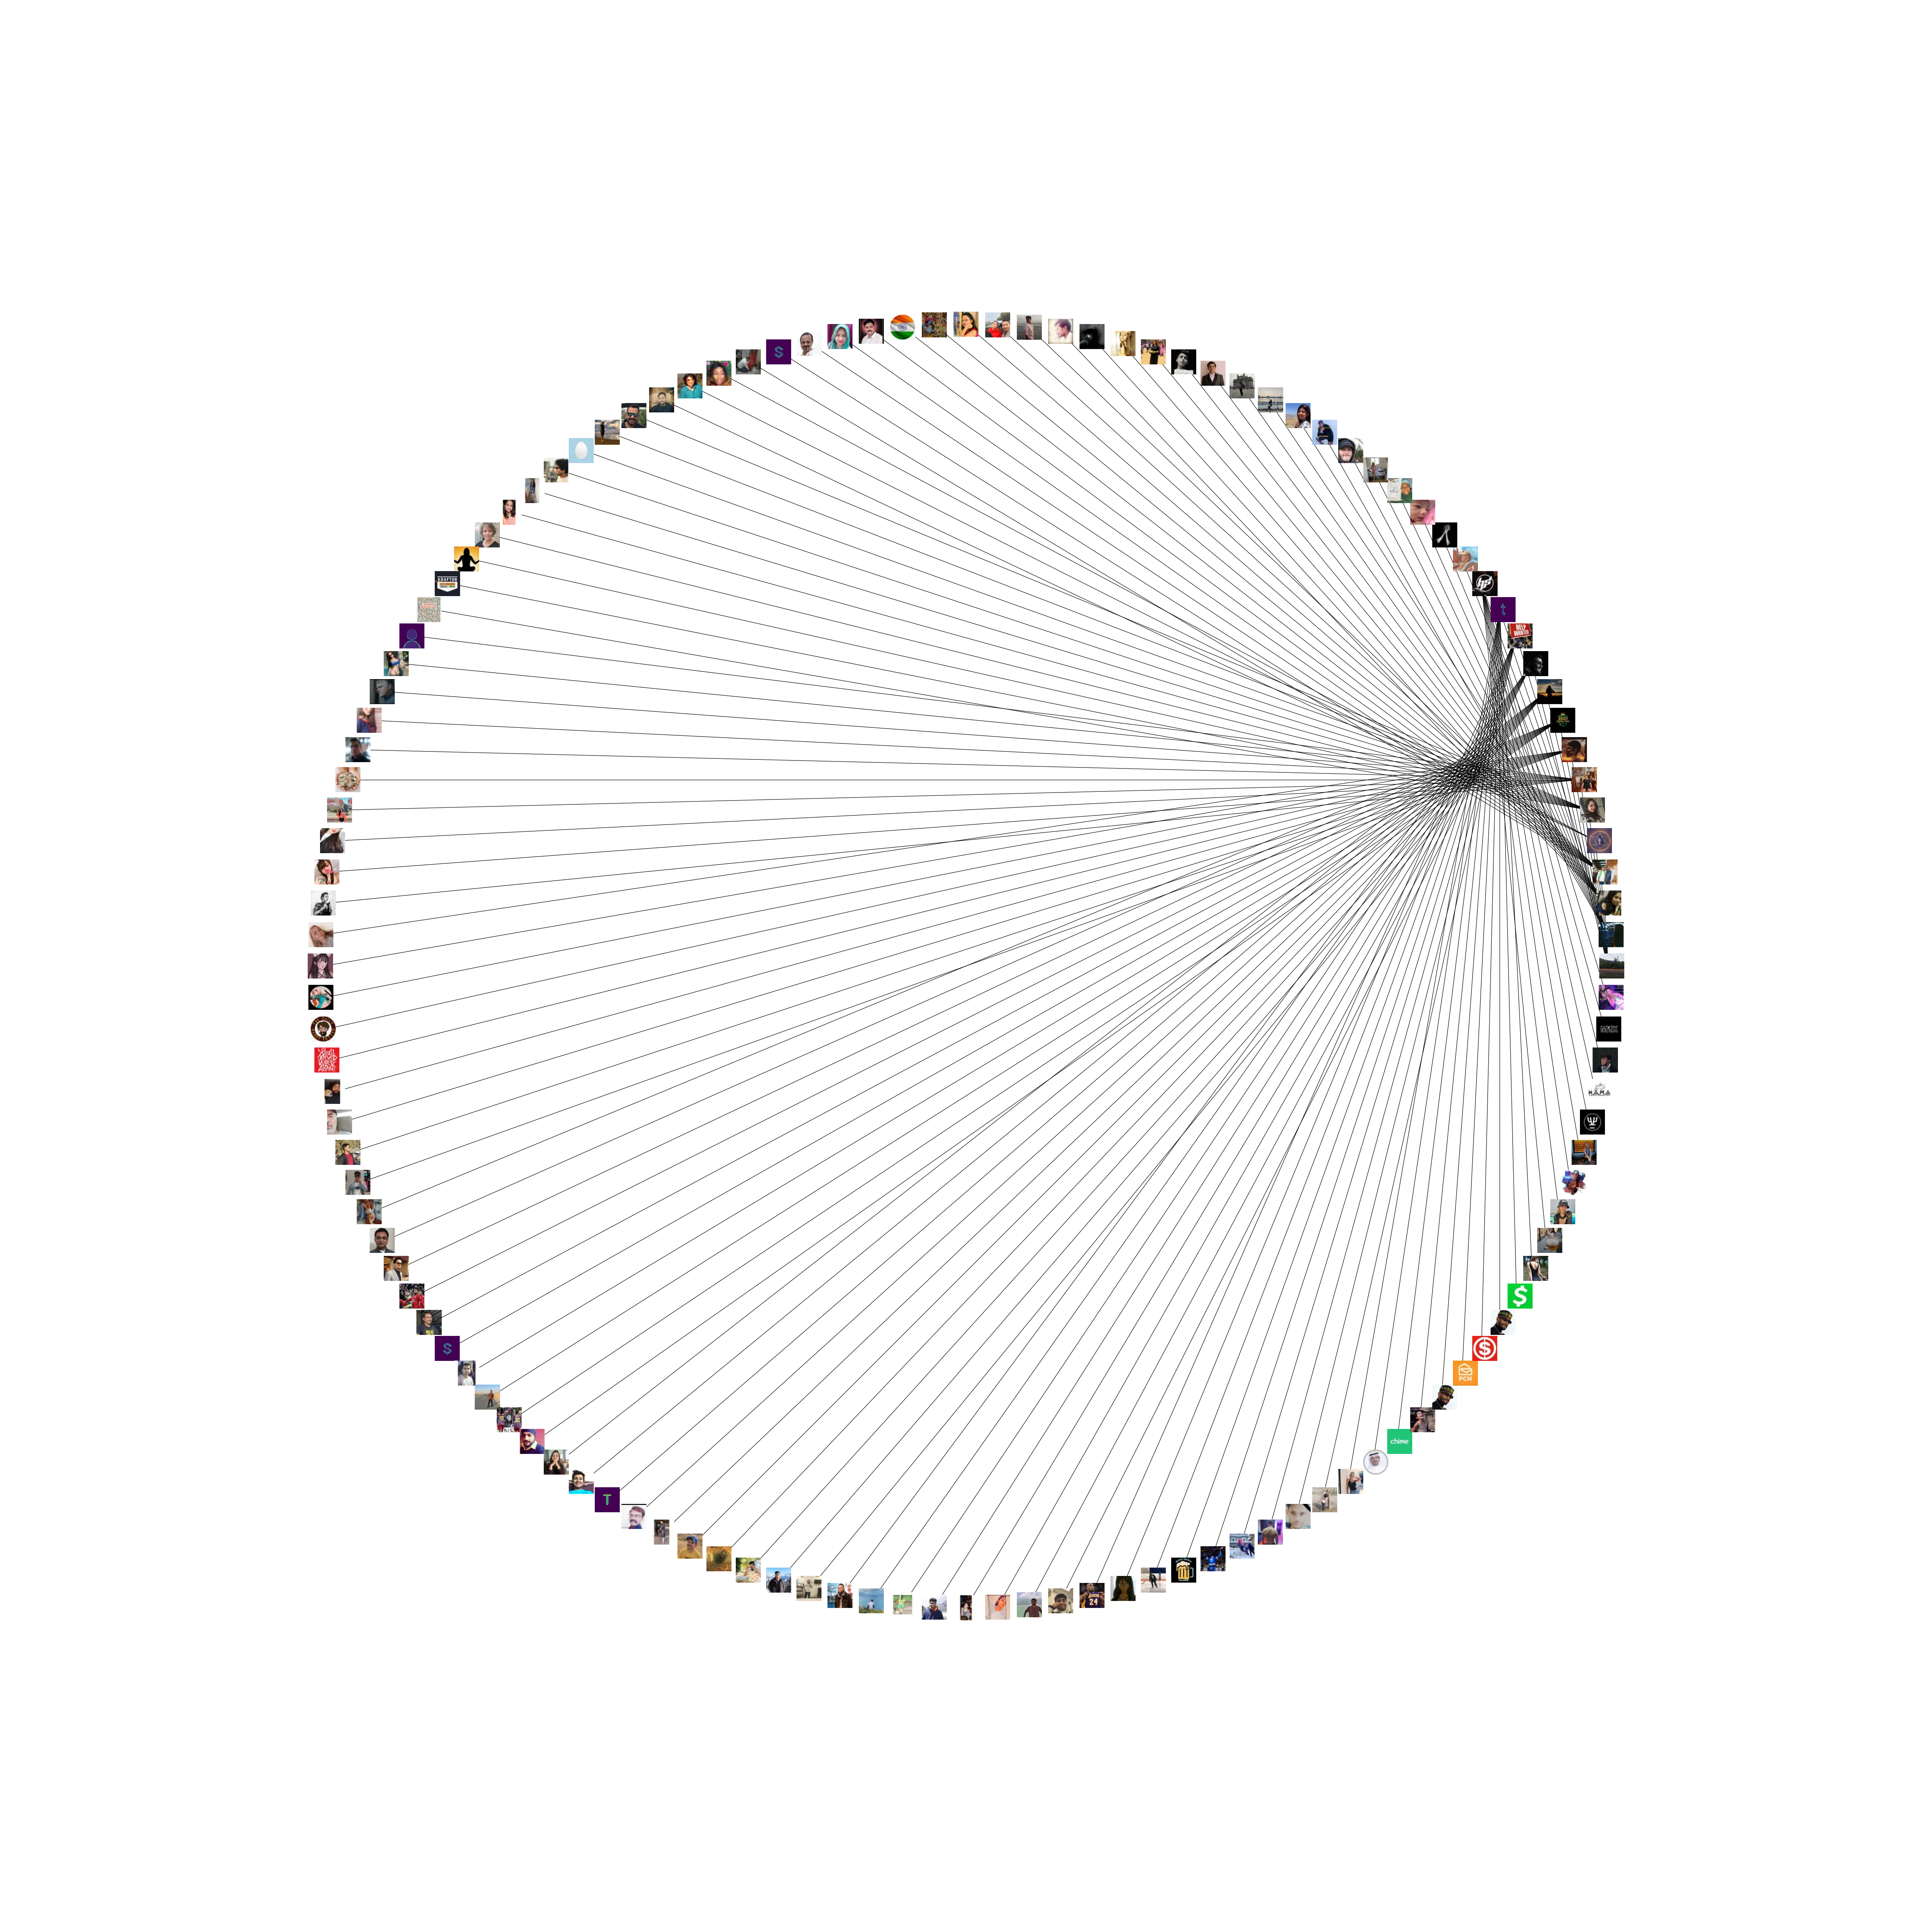

In [42]:

pos = nx.circular_layout(G)

fig = plt.figure(figsize=(75, 75))
ax = plt.subplot(111)
ax.set_aspect("equal")
nx.draw_networkx_edges(G, pos, ax=ax)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

piesize = 0.01  # this is the image size
p2 = piesize / 2.0
for n in G:
    xx, yy = trans(pos[n])  # figure coordinates
    xa, ya = trans2((xx, yy))  # axes coordinates
    a = plt.axes([xa - p2, ya - p2, piesize, piesize])
    a.set_aspect("equal")
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
ax.axis("off")
plt.show()


### Degree Analysis

In [43]:
G.degree

DegreeView({'ps_pujansheth': 10, 'irvingjoanne17': 11, 'Pari1602': 10, 'mbbarot69': 11, 'kush0099': 4, 'payal_pabari': 11, 'MrDavid1901': 11, 'JubinYadav1': 10, 'JPL_India': 11, 'RashiJoshi19': 11, 'PenhaAllen': 9, 'michaelvbuffalo': 10, 'Wright_habits': 11, 'HookedSounds': 10, 'JeD87260622': 1, 'LhordRicch1': 1, 'Hasa007788': 1, 'FnSbyruqayyah': 1, 'maxine_dwnunder': 1, 'SapetaJes': 1, 'WIZZYCHRISMUSI3': 1, 'SwatiRKSaha': 1, 'BhattKesha2806': 1, 'MarooMansi': 1, 'siddharth_sonak': 1, 'PawaskarKeyur': 1, 'kimaya_mhatre_': 1, 'aditi_metkar': 1, 'AdityaSatpurkar': 1, 'durgappadk9': 1, 'pandeyvinay1297': 1, 'RajeevShuklaBjp': 1, 'JuhiDeshmukh1': 1, 'Jitharshjaihind': 1, 'Jayprak67848307': 1, 'RajuSingh990': 1, 'Sanjuve2024': 1, 'shaileshbrahm': 1, 'Supriya00646442': 1, 'drmahendra3069': 1, 'KokoOmbu': 1, 'jaggirm': 1, '1710RAJ': 1, 'shottrader2006': 1, 'Takfaheem': 1, '9cf94c8bf7c6472': 1, 'csheth12': 1, 'keshavimehta13': 1, 'talati_palak': 1, 'IngriddeBock': 1, 'TheSecretLawofA': 1, 'KRA

<BarContainer object of 128 artists>

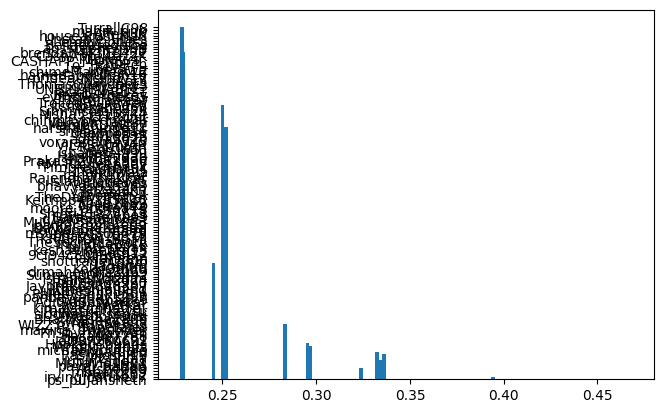

In [44]:
dic_closeness = nx.closeness_centrality(G)
plt.bar(dic_closeness.values(), dic_closeness.keys(), 0.002)

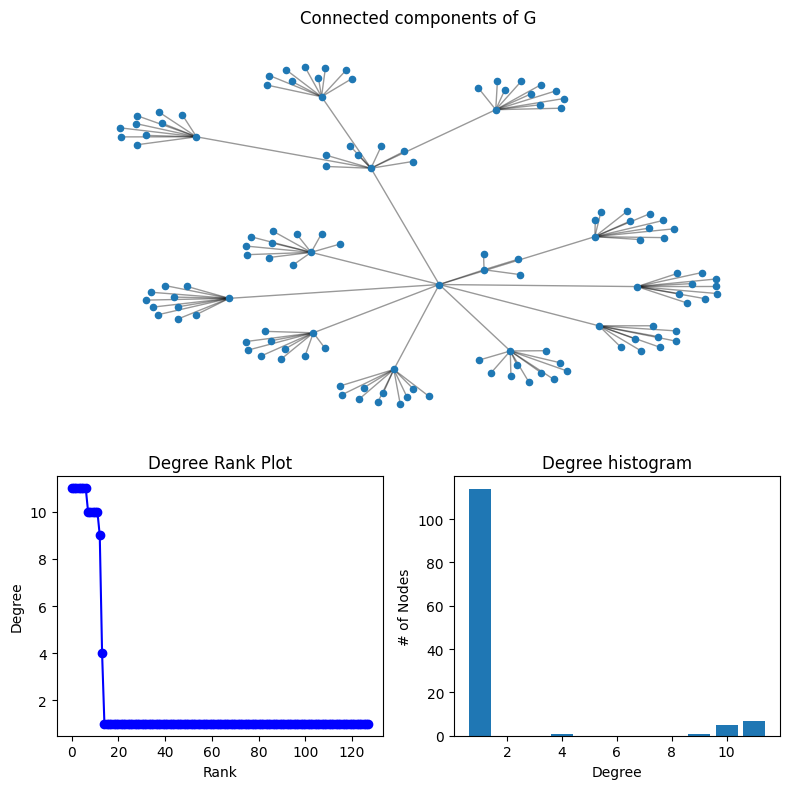

In [45]:

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

### Betweeness Centrality

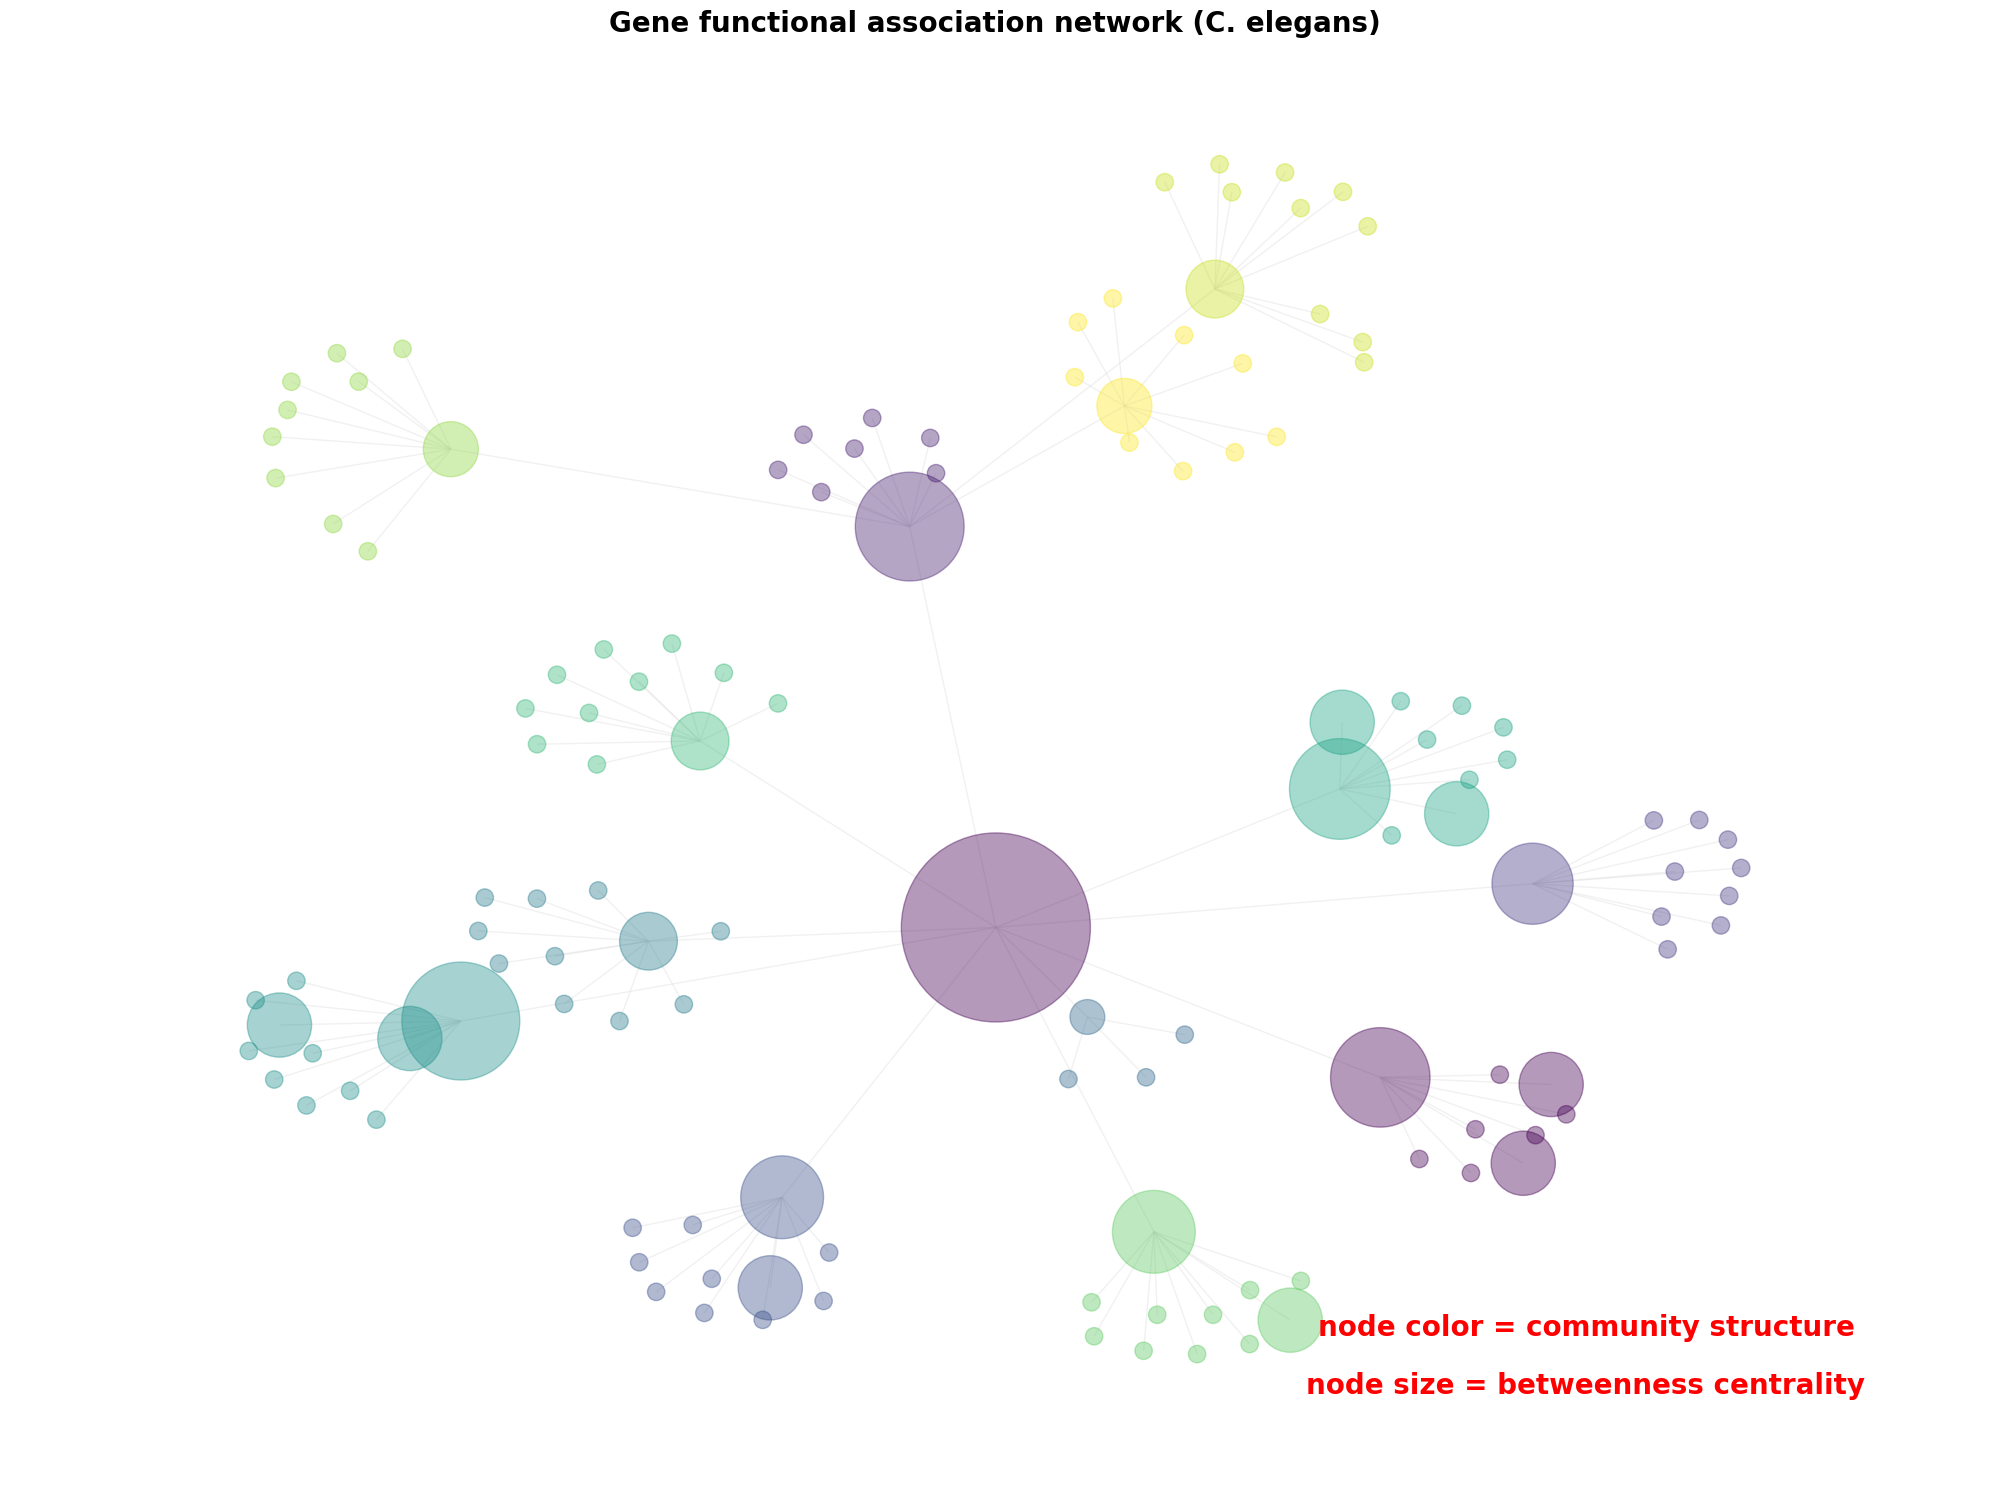

In [46]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [47]:
centrality

{'ps_pujansheth': 0.926771653543307,
 'irvingjoanne17': 0.30708661417322836,
 'Pari1602': 0.17086614173228346,
 'mbbarot69': 0.1779527559055118,
 'kush0099': 0.031496062992125984,
 'payal_pabari': 0.08661417322834646,
 'MrDavid1901': 0.3606299212598425,
 'JubinYadav1': 0.262992125984252,
 'JPL_India': 0.08661417322834646,
 'RashiJoshi19': 0.1779527559055118,
 'PenhaAllen': 0.2566929133858268,
 'michaelvbuffalo': 0.07874015748031496,
 'Wright_habits': 0.08661417322834646,
 'HookedSounds': 0.07874015748031496,
 'JeD87260622': 0.007874015748031496,
 'LhordRicch1': 0.007874015748031496,
 'Hasa007788': 0.007874015748031496,
 'FnSbyruqayyah': 0.007874015748031496,
 'maxine_dwnunder': 0.007874015748031496,
 'SapetaJes': 0.007874015748031496,
 'WIZZYCHRISMUSI3': 0.007874015748031496,
 'SwatiRKSaha': 0.007874015748031496,
 'BhattKesha2806': 0.007874015748031496,
 'MarooMansi': 0.007874015748031496,
 'siddharth_sonak': 0.007874015748031496,
 'PawaskarKeyur': 0.007874015748031496,
 'kimaya_mhatre